# 1. 푸리에 급수 근사

- 주기함수 f(x)= {
                 
                    1 (0 < x < 1)
                    2 (1 < x < 2)
                 
                 }
                f(0)=f(2)=0, f(x)=f(x+2)
                를 푸리에 급수 n차 다항식으로 근사
                
# 2. 푸리에 변환 응용

- 진동 분석
- 음성 파일 고음 제거


## f(x)의 푸리에 급수 근사

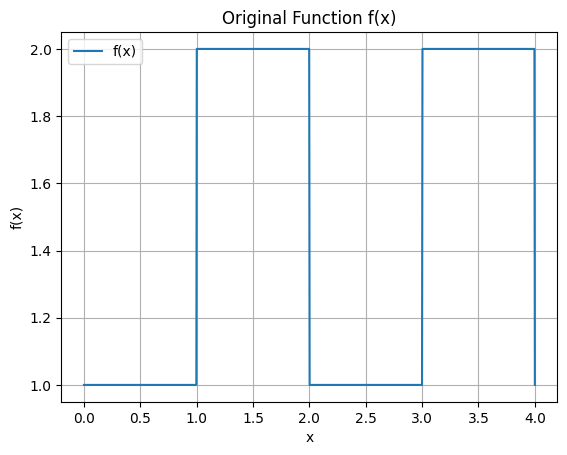

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 함수 f(x)
def f(x):
    x = x % 2  # 주기가 2이므로 주기 내에서 계산
    if 0 <= x < 1:
        return 1
    elif 1 <= x < 2:
        return 2
    else:
        return 0

# x 범위 설정
x_values = np.linspace(0, 4, 1000)  # 주기를 두 번 반복하여 4까지 표시
y_values = [f(x) for x in x_values]

# 그래프 그리기
plt.plot(x_values, y_values, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Original Function f(x)')
plt.legend()
plt.grid(True)

# 그래프 표시
plt.show()


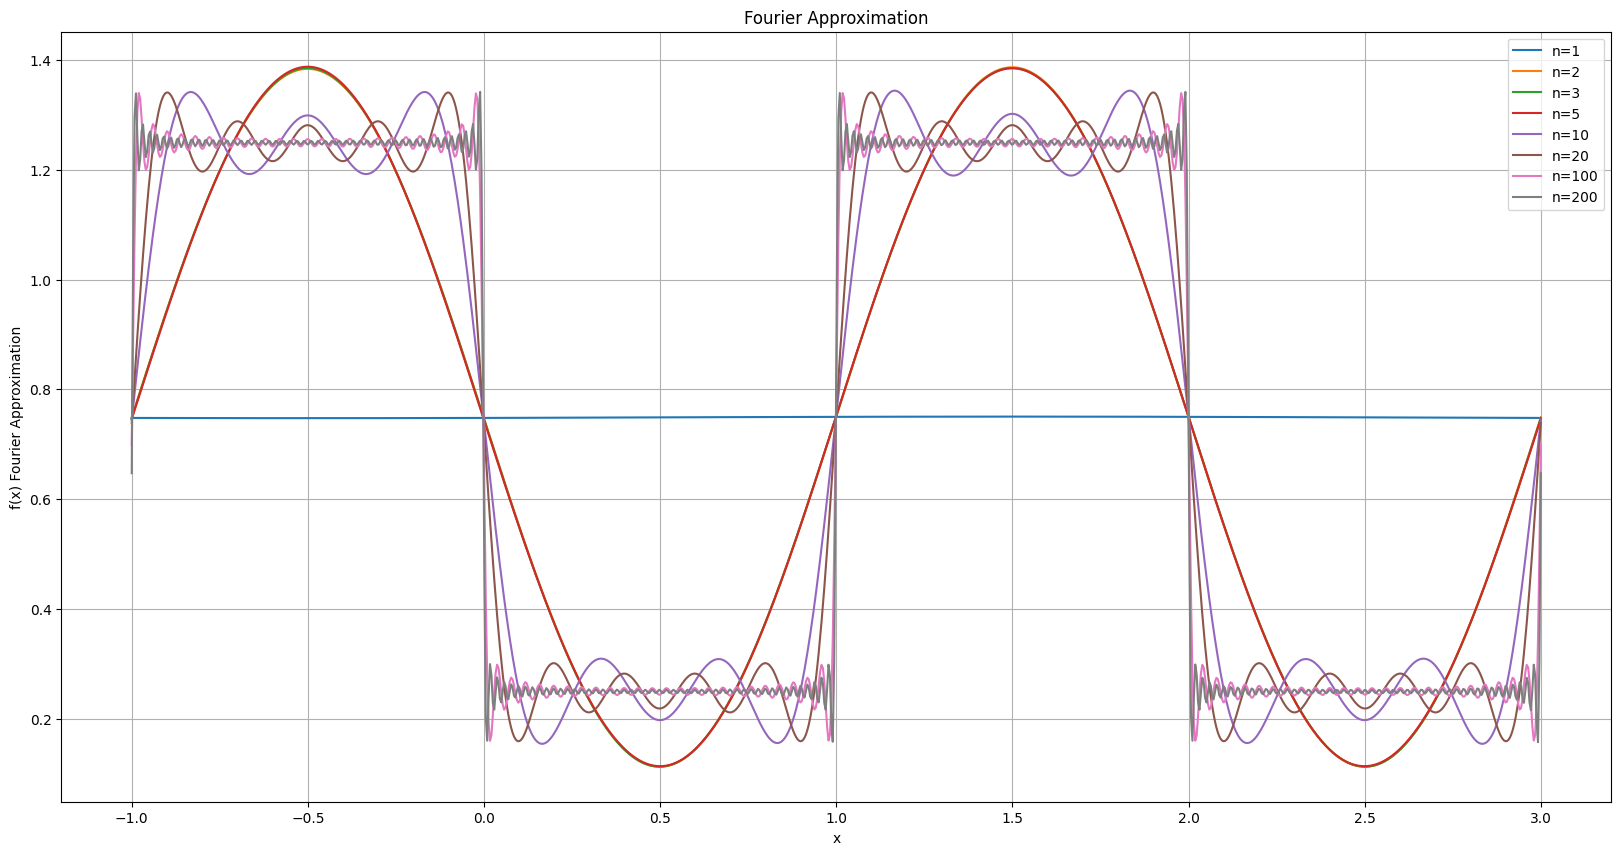

In [3]:
# 푸리에 근사 계산 함수
def fourier_approximation(n, T, x):
    a0 = (1 / T) * np.trapz([f(x) for x in np.linspace(0, T, 1000)], dx=T/1000)  # a0 계수 계산

    # a_n과 b_n 계수 계산
    a_coeffs = []
    b_coeffs = []
    for i in range(1, n + 1):
        a_n = (2 / T) * np.trapz([f(x) * np.cos(2 * np.pi * i * x / T) for x in np.linspace(0, T, 1000)], dx=T/1000)
        b_n = (2 / T) * np.trapz([f(x) * np.sin(2 * np.pi * i * x / T) for x in np.linspace(0, T, 1000)], dx=T/1000)
        a_coeffs.append(a_n)
        b_coeffs.append(b_n)

    # 푸리에 근사 계수 합 구하기
    result = a0 / 2
    for i in range(n):
        result += a_coeffs[i] * np.cos(2 * np.pi * (i + 1) * x / T) + b_coeffs[i] * np.sin(2 * np.pi * (i + 1) * x / T)

    return result

# 주어진 구간에서 푸리에 근사를 계산
T = 4   
x_values = np.linspace(-1, 3, 1000)  # [-1, 3] 구간으로 수정

# n 값 리스트 설정
n_values = [1, 2, 3, 5, 10, 20, 100,200]

plt.figure(figsize=(20, 10))
for n in n_values:
    approximations = [fourier_approximation(n, T, x) for x in x_values]
    plt.plot(x_values, approximations, label=f'n={n}')

# 결과 시각화
plt.xlabel('x')
plt.ylabel('f(x) Fourier Approximation')
plt.title('Fourier Approximation')
plt.grid(True)
plt.legend()
plt.show()


## 푸리에 변환 응용

In [10]:
import numpy as np
import scipy.io.wavfile as wavfile
import os

def remove_high_frequencies(input_audio_path, output_audio_path, cutoff_frequency):
    # 입력 오디오 파일의 절대 경로를 생성합니다.
    desktop_path = os.path.expanduser("~/Desktop")  # 바탕화면 경로
    input_audio_full_path = os.path.join(desktop_path, input_audio_path)

    # 오디오 파일을 읽고 샘플링 주파수와 오디오 데이터를 얻습니다.
    sample_rate, audio_data = wavfile.read(input_audio_full_path)

    # 푸리에 변환을 수행하여 주파수 스펙트럼을 얻습니다.
    spectrum = np.fft.fft(audio_data)

    # C5 (도 5번째 옥타브) 이상의 주파수를 제거합니다.
    # C5 주파수는 약 523.25 Hz입니다.
    cutoff_index = int(cutoff_frequency * len(spectrum) / sample_rate)
    spectrum[cutoff_index:] = 0

    # 역 푸리에 변환을 수행하여 수정된 오디오 데이터를 얻습니다.
    modified_audio_data = np.fft.ifft(spectrum).real.astype(np.int16)

    # 수정된 오디오 데이터를 파일로 저장합니다.
    wavfile.write(output_audio_path, sample_rate, modified_audio_data)

if __name__ == "__main__":
    input_audio_path = "test_audio.wav"  # 입력 오디오 파일 이름 (바탕화면에 있어야 함)
    output_audio_path = os.path.join(desktop_path, "output_audio.wav")  # 출력 오디오 파일 이름
    cutoff_frequency = 523.25  # C5 (도 5번째 옥타브) 주파수 (Hz)

    remove_high_frequencies(input_audio_path, output_audio_path, cutoff_frequency)


In [14]:
import numpy as np
import scipy.io.wavfile as wavfile
import os

def remove_high_frequencies(input_audio_path, output_audio_path, cutoff_frequency):
    # 입력 오디오 파일의 절대 경로를 생성합니다.
    desktop_path = os.path.expanduser("~/Desktop")  # 바탕화면 경로
    input_audio_full_path = os.path.join(desktop_path, input_audio_path)

    # 오디오 파일을 읽고 샘플링 주파수와 오디오 데이터를 얻습니다.
    sample_rate, audio_data = wavfile.read(input_audio_full_path)

    # 푸리에 변환을 수행하여 주파수 스펙트럼을 얻습니다.
    spectrum = np.fft.fft(audio_data)

    cutoff_index = int(cutoff_frequency * len(spectrum) / sample_rate)
    spectrum[cutoff_index:] = 0

    # 역 푸리에 변환을 수행하여 수정된 오디오 데이터를 얻습니다.
    modified_audio_data = np.fft.ifft(spectrum).real.astype(np.int16)

    # 수정된 오디오 데이터를 파일로 저장합니다.
    wavfile.write(output_audio_path, sample_rate, modified_audio_data)

if __name__ == "__main__":
    input_audio_path = "piano.wav"  # 입력 오디오 파일 이름 (바탕화면에 있어야 함)
    output_audio_path = os.path.join(desktop_path, "output_audio2.wav")  # 출력 오디오 파일 이름
    cutoff_frequency = 5000  # 제거 음역대 주파수

    remove_high_frequencies(input_audio_path, output_audio_path, cutoff_frequency)
